### Problem Statement
- To predict whether the performed transaction is fraud or normal.


### Data set
I have taken the dataset from kaggle [Click here]("https://www.kaggle.com/mlg-ulb/creditcardfraud")
#####  The given dataset contains following parameters:
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numeric input variables which are the result of a PCA transformation.  
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


#### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Versions of packages

In [2]:
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)

numpy: 1.18.1
pandas: 1.0.1
seaborn: 0.10.0
matplotlib: 3.1.3


#### Reading the dataset

In [3]:

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### To check number of rows and columns in the given dataset.

In [4]:
# total number of columns and rows in the given dataset.
df.shape

(284807, 31)

In [5]:
# display all the column names in the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# display the information of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# cheacking the types
df.dtypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# To display the statistical information of the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
# checking for null values in each column
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#  finding the missing values in each col
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

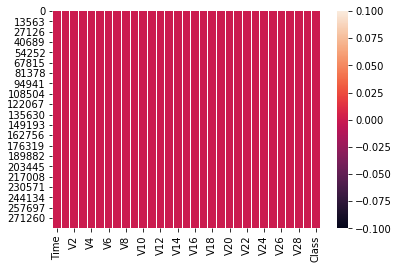

In [11]:
 # heatmap to visulalize the missing values
sns.heatmap(df.isna()) 

- As we can see there are no missing values in our dataset

In [12]:
#To calculate number of fraud and normal transactions
fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
print(fraud.shape,Normal.shape)

(492, 31) (284315, 31)


Text(0, 0.5, 'frequency')

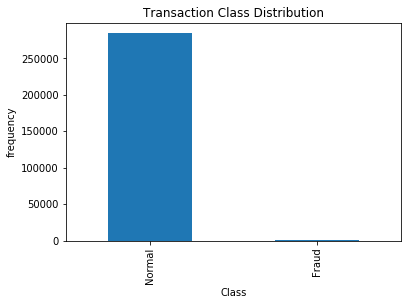

In [13]:
# Visulazing using the bar plot
LABELS = ["Normal" , "Fraud"]
count_classes = pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("frequency")


From above graph we can see that the data is highly unbalanced i.e it has very high number of normal transactions when compared to that of fraud transactions

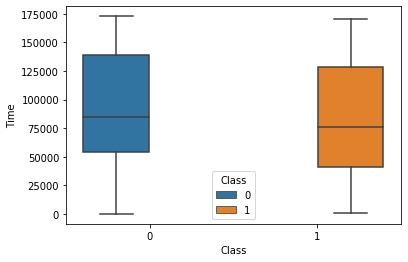

In [14]:
# Visulalizing using the box plot
sns.boxplot(x = "Class", y = "Time",hue='Class', data = df)
plt.show()

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

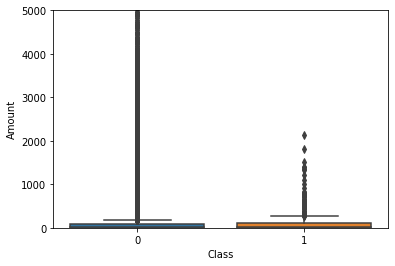

In [15]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 2500-3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

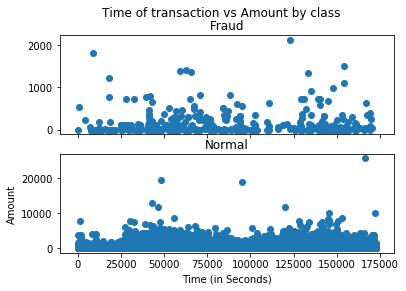

In [16]:
# We Will check Do fraudulent transactions occur more often during certain time frame 
# Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

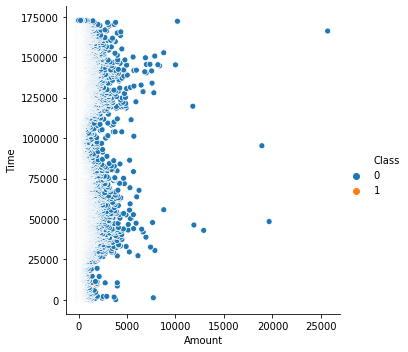

In [17]:
# Visulalizing using the relational plot 

sns.relplot(x='Amount',y='Time',hue='Class',data=df)

From the above graph we can observe that we have very less number of fraud transactions when compared to normal transactions ,which states that it is an imbalanced dataset

### Balancing the dataset

In [18]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=120)
X,y = smk.fit_sample(df.drop(['Class'],axis=1),df['Class'])

In [19]:
y.value_counts()

1    283765
0    283765
Name: Class, dtype: int64

##### Splitting the dataset

In [20]:
#Splitting the dataset into training and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454024, 30)
(113506, 30)
(454024,)
(113506,)


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
# we have to apply this object(Log_reg) to the training data
final_model1 = log_reg.fit(X_train,y_train) # with the help of fit method we are fitting logistic regression with training data
##objectName.fit(InputData, outputData)

#### Instead of directly predicting on test data, let us see how well the model predicts the training data
- Predicting on the training data

```syntax: objectName.predict(Input)```

In [23]:
y_train_pred = log_reg.predict(X_train)
y_train_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [24]:
y_train == y_train_pred # comparing original data o/p and model predicted o/p

119440    True
96043     True
369660    True
207082    True
433513    True
          ... 
371403    True
491263    True
470924    True
491755    True
128037    True
Name: Class, Length: 454024, dtype: bool

In [25]:
# applying metrics on training data
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[222404,   4496],
       [  8081, 219043]], dtype=int64)

In [26]:
# Accuracy score for training data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9722988212076895

In [27]:
# f1-score for training data
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9720922285610312

- Predicting on test data

In [28]:
# Predicting the model on test data
y_test_pred = log_reg.predict(X_test)

In [29]:
y_test_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
y_test == y_test_pred

395737    True
473850    True
50426     True
344637    True
148214    True
          ... 
234610    True
169248    True
508560    True
336336    True
504712    True
Name: Class, Length: 113506, dtype: bool

In [31]:
# applying metrics on test data
confusion_matrix(y_test,y_test_pred)

array([[55727,  1138],
       [ 1959, 54682]], dtype=int64)

In [32]:
# accuracy score for test data
accuracy_score(y_test,y_test_pred)

0.9727150987612989

In [33]:
# f1-Score for test data
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.972461564453455

In [34]:
#classification report on training and test data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))
print("-----------------------------------------------------")
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    226900
           1       0.98      0.96      0.97    227124

    accuracy                           0.97    454024
   macro avg       0.97      0.97      0.97    454024
weighted avg       0.97      0.97      0.97    454024

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56865
           1       0.98      0.97      0.97     56641

    accuracy                           0.97    113506
   macro avg       0.97      0.97      0.97    113506
weighted avg       0.97      0.97      0.97    113506



In [35]:
#Probability of each class
y_test_prob1 = final_model1.predict_proba(X_test)
y_test_prob1 = pd.DataFrame(y_test_prob1)
y_test_prob1.head()

,0,1
0,0.000000e+00,1.000000
1,9.035439e-12,1.000000
2,9.510145e-01,0.048985
3,0.000000e+00,1.000000
4,8.709488e-01,0.129051


In [36]:
df1 = pd.DataFrame({"col3": [0.000000e+00,9.035439e-12,9.510145e-01,0.000000e+00,8.709488e-01]})
df1

,col3
0,0.000000e+00
1,9.035439e-12
2,9.510145e-01
3,0.000000e+00
4,8.709488e-01


In [37]:
df1['col3'] = df1['col3'].astype(int)
df1

,col3
0,0
1,0
2,0
3,0
4,0


In [38]:
y_test

395737    1
473850    1
50426     0
344637    1
148214    0
         ..
234610    0
169248    0
508560    1
336336    1
504712    1
Name: Class, Length: 113506, dtype: int64

#### Plot the ROC Curve for the model and find the AUC for LogisticRegression

In [39]:
# import the roc_auc_score, roc_curve from sklearn.metrics
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob1 = final_model1.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, fraud_prob1)

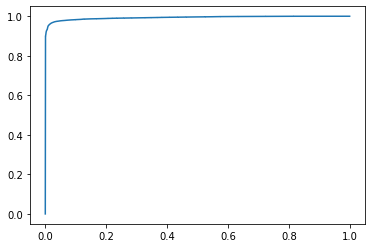

In [40]:
plt.plot(fpr1, tpr1)

In [41]:
roc_auc_score(y_test, fraud_prob1)

0.9930467703750365

### Random forest classification

In [42]:
#import initialize and fit
#import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

#initialize the object for RFC
rfc = RandomForestClassifier()

#fit RFC to dataset
final_model2 = rfc.fit(X_train,y_train)

In [43]:
y_train_pred1 = rfc.predict(X_train) #Predicting on training data

In [44]:
confusion_matrix(y_train,y_train_pred1)

array([[226900,      0],
       [     0, 227124]], dtype=int64)

In [45]:
accuracy_score(y_train,y_train_pred1)

1.0

In [46]:
y_test_pred1 = rfc.predict(X_test) #Predicting on test data

In [47]:
confusion_matrix(y_test,y_test_pred1)

array([[56851,    14],
       [    0, 56641]], dtype=int64)

In [48]:
accuracy_score(y_test,y_test_pred1)

0.9998766585026342

In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred1)

0.9998764298827849

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred1))
print("------------------------------------------------------")
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226900
           1       1.00      1.00      1.00    227124

    accuracy                           1.00    454024
   macro avg       1.00      1.00      1.00    454024
weighted avg       1.00      1.00      1.00    454024

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       1.00      1.00      1.00     56641

    accuracy                           1.00    113506
   macro avg       1.00      1.00      1.00    113506
weighted avg       1.00      1.00      1.00    113506



In [51]:
y_test_prob2 = final_model2.predict_proba(X_test)
y_test_prob2 = pd.DataFrame(y_test_prob2)
y_test_prob2

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
113501,1.0,0.0
113502,1.0,0.0
113503,0.0,1.0
113504,0.0,1.0


In [52]:
y_test

395737    1
473850    1
50426     0
344637    1
148214    0
         ..
234610    0
169248    0
508560    1
336336    1
504712    1
Name: Class, Length: 113506, dtype: int64

#### Plot the ROC Curve for the model and find the AUC for Randomforest

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob2 = final_model2.predict_proba(X_test)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, fraud_prob2)

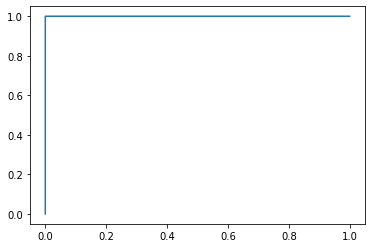

In [54]:
plt.plot(fpr2, tpr2)

In [55]:
roc_auc_score(y_test, fraud_prob2)

0.999999558972894

### Naive bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
final_model3 = gn.fit(X_train,y_train)
y_train_pred2 = gn.predict(X_train)

In [57]:
confusion_matrix(y_train,y_train_pred2)

array([[225269,   1631],
       [ 58254, 168870]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred2)

0.8681016862544711

In [59]:
y_test_pred2 = gn.predict(X_test)

In [60]:
confusion_matrix(y_test,y_test_pred2)

array([[56433,   432],
       [14546, 42095]], dtype=int64)

In [61]:
accuracy_score(y_test,y_test_pred2)

0.8680422180325269

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred2)

0.8489633752823492

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred2))
print("------------------------------------------------------")
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    226900
           1       0.99      0.74      0.85    227124

    accuracy                           0.87    454024
   macro avg       0.89      0.87      0.87    454024
weighted avg       0.89      0.87      0.87    454024

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     56865
           1       0.99      0.74      0.85     56641

    accuracy                           0.87    113506
   macro avg       0.89      0.87      0.87    113506
weighted avg       0.89      0.87      0.87    113506



In [64]:
y_test_prob3 = final_model3.predict_proba(X_test)
y_test_prob3 = pd.DataFrame(y_test_prob3)
y_test_prob3.head()

,0,1
0,1.478372e-41,1.000000e+00
1,2.545047e-06,9.999975e-01
2,1.000000e+00,4.262604e-10
3,6.419772e-26,1.000000e+00
4,1.000000e+00,5.729368e-10


In [65]:
data = pd.DataFrame({"col1": [1.478372e-41,2.545047e-06,1.000000e+00,6.419772e-26,1.000000e+00]})
data

,col1
0,1.478372e-41
1,2.545047e-06
2,1.000000e+00
3,6.419772e-26
4,1.000000e+00


In [66]:
data['col1'] = data['col1'].astype(int)
data

,col1
0,0
1,0
2,1
3,0
4,1


In [67]:
data1 = pd.DataFrame({'col2':[1.000000e+00,9.999975e-01,4.262604e-10,1.000000e+00,5.729368e-10]})
data1

,col2
0,1.000000e+00
1,9.999975e-01
2,4.262604e-10
3,1.000000e+00
4,5.729368e-10


In [68]:
data1['col2'] = data1['col2'].astype(int)
data1

,col2
0,1
1,0
2,0
3,1
4,0


In [69]:
y_test.head()

395737    1
473850    1
50426     0
344637    1
148214    0
Name: Class, dtype: int64

#### Plot the ROC Curve for the model and find the AUC for NaiveBayes

In [70]:
#1-->fraud 0-->genuine
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob3 = final_model3.predict_proba(X_test)[:,1]
fpr3, tpr3, threshold3 = roc_curve(y_test, fraud_prob3)

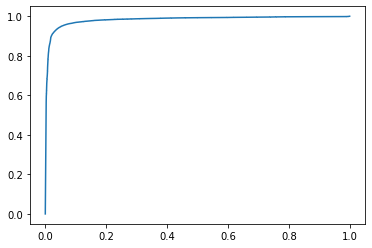

In [71]:
plt.plot(fpr3, tpr3)

In [72]:
roc_auc_score(y_test, fraud_prob3)

0.9825532882565753

### Best among logistic regression,Random forest and NaiveBayes

- Since the data is highly unbalanced here we are considering f1-score as metrics.. 

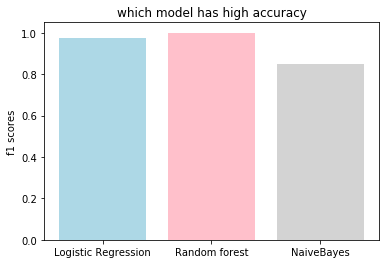

In [73]:
models = ['Logistic Regression','Random forest','NaiveBayes']
f1_scores = [0.972461564453455,0.9998764298827849,0.8489633752823492]
plt.bar(models,f1_scores,color=['lightblue','pink','lightgrey'])
plt.ylabel("f1 scores")
plt.title("which model has high accuracy")
plt.show()

--> Observation: From the above graph we can observe that **Random Forest** has the highest f1-score

 (Since the Scores for the algorithm[Random forest] is highest we no need to apply hyper parameter tuning)